Affine Transformation

Affine Transformation is a geometric transformation that preserves points, straight lines, and planes. It allows for operations like translation, scaling, rotation, shearing, and reflection while maintaining parallelism in the input and output images.

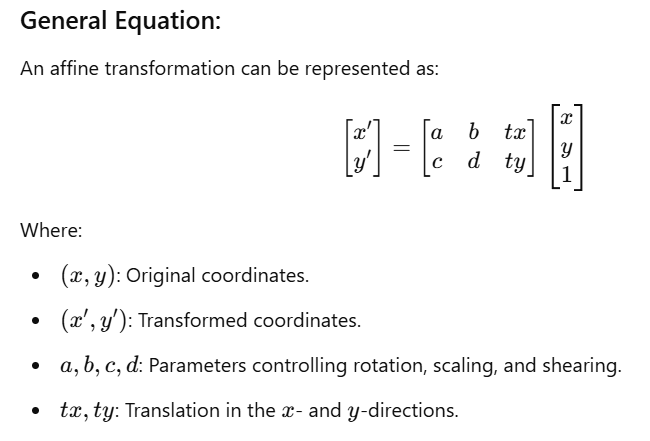

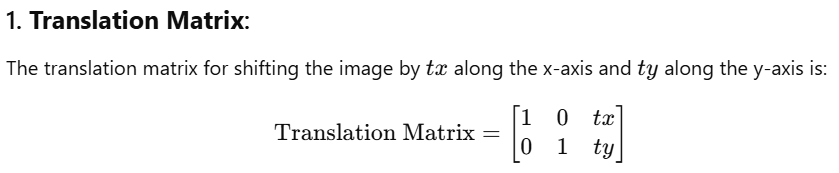

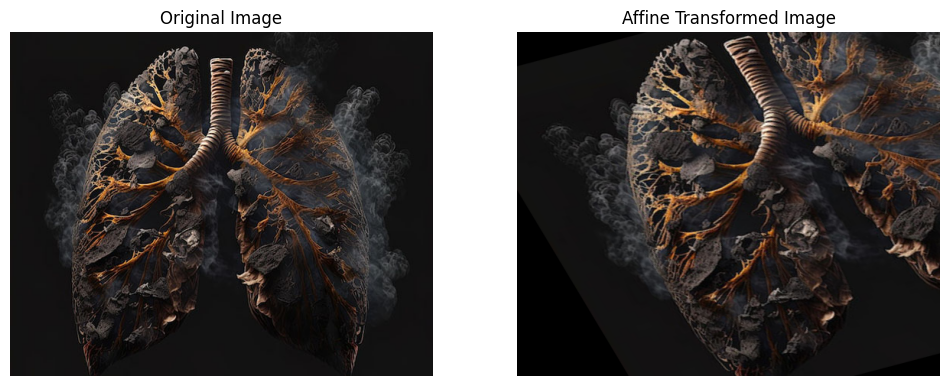

Affine transformed image saved successfully!


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Define the affine transformation matrix
# Example: Scale and rotate
rows, cols, _ = image.shape
src_points = np.float32([[50, 50], [200, 50], [50, 200]])  # Points in original image
dst_points = np.float32([[10, 100], [200, 50], [100, 250]])  # Corresponding points in transformed image

# Get the affine transformation matrix
affine_matrix = cv2.getAffineTransform(src_points, dst_points)

# Apply affine transformation
affine_transformed = cv2.warpAffine(image, affine_matrix, (cols, rows))

# Display the original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

# Affine transformed image
ax[1].imshow(cv2.cvtColor(affine_transformed, cv2.COLOR_BGR2RGB))
ax[1].set_title("Affine Transformed Image")
ax[1].axis('off')

plt.show()

# Save the affine transformed image
cv2.imwrite('affine_transformed_lung.jpg', affine_transformed)

print("Affine transformed image saved successfully!")


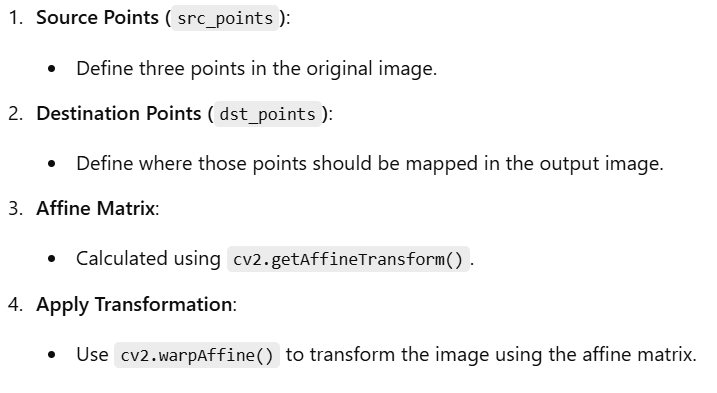

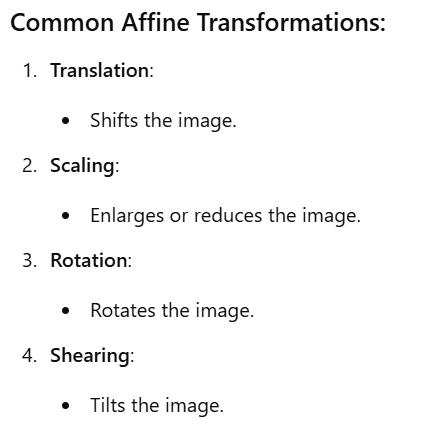

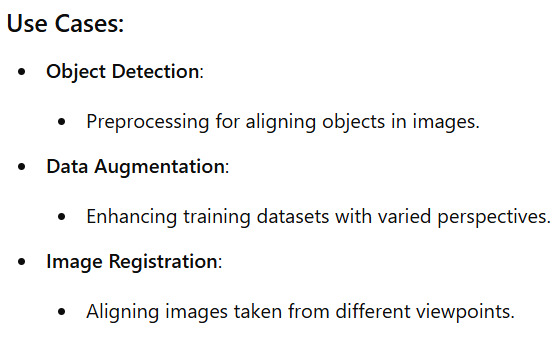

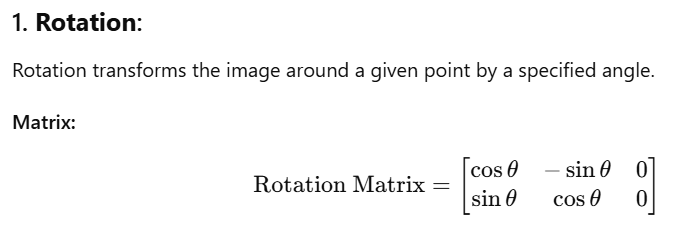

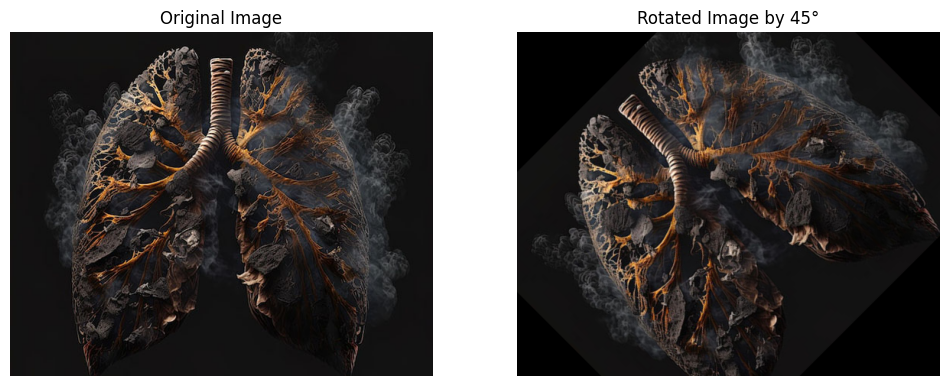

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Get the rotation matrix
rows, cols, _ = image.shape
angle = 45  # Rotation angle in degrees
center = (cols // 2, rows // 2)  # Rotate around the center of the image
scale = 1.0  # No scaling
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

# Apply the rotation
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))

# Display the original and rotated image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Rotated Image by {angle}°")
ax[1].axis('off')

plt.show()


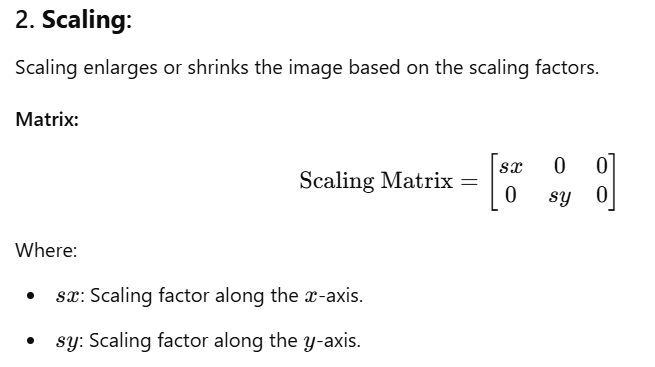

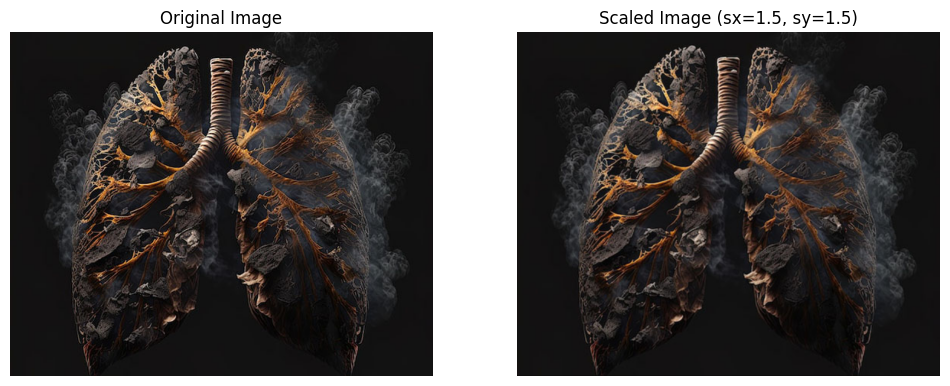

In [3]:
# Scaling factors
sx, sy = 1.5, 1.5  # Increase size by 1.5 times

# Scaling matrix
scaling_matrix = np.float32([[sx, 0, 0], [0, sy, 0]])

# Apply scaling
scaled_image = cv2.warpAffine(image, scaling_matrix, (int(cols * sx), int(rows * sy)))

# Display the original and scaled image
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Scaled Image (sx={sx}, sy={sy})")
ax[1].axis('off')

plt.show()


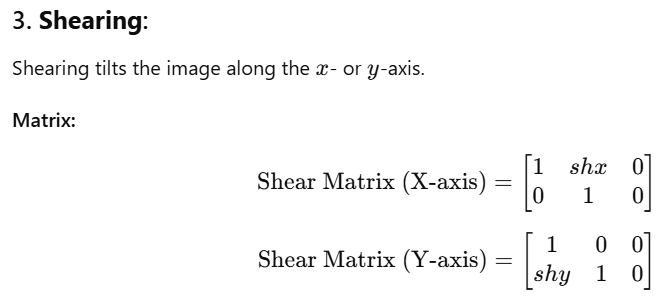

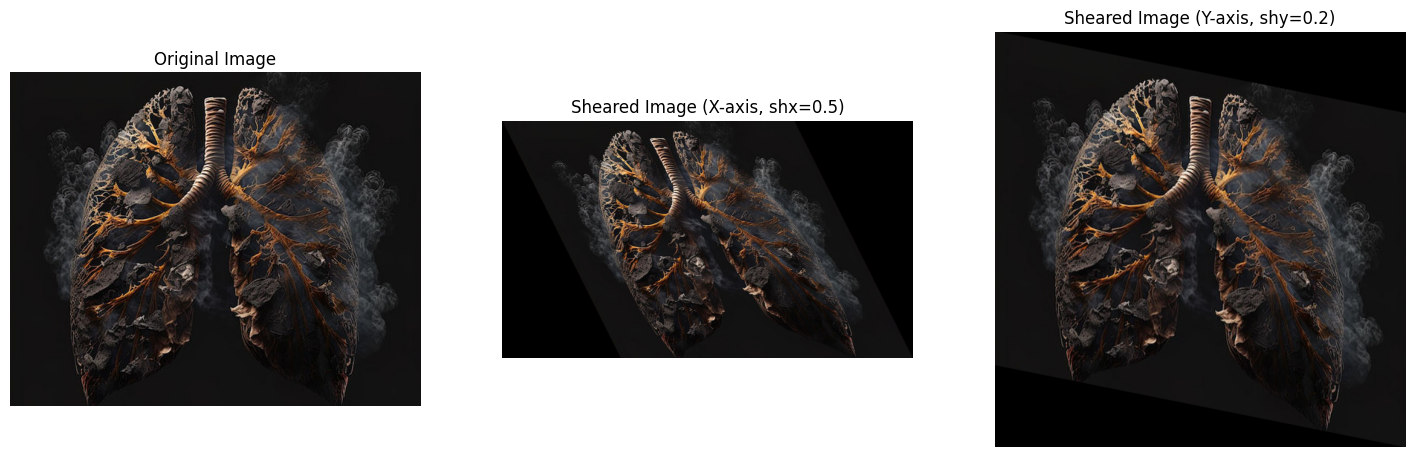

In [4]:
# Shearing factors
shx, shy = 0.5, 0.2  # Shearing along x-axis and y-axis

# Shearing matrix for X-axis
shearing_matrix_x = np.float32([[1, shx, 0], [0, 1, 0]])

# Apply X-axis shearing
sheared_image_x = cv2.warpAffine(image, shearing_matrix_x, (cols + int(rows * shx), rows))

# Shearing matrix for Y-axis
shearing_matrix_y = np.float32([[1, 0, 0], [shy, 1, 0]])

# Apply Y-axis shearing
sheared_image_y = cv2.warpAffine(image, shearing_matrix_y, (cols, rows + int(cols * shy)))

# Display original and sheared images
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[0].axis('off')

ax[1].imshow(cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB))
ax[1].set_title(f"Sheared Image (X-axis, shx={shx})")
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB))
ax[2].set_title(f"Sheared Image (Y-axis, shy={shy})")
ax[2].axis('off')

plt.show()


Interpolation

Interpolation is a technique used to estimate values at points between known data points. In image processing, interpolation is used during geometric transformations like rotation, scaling, and translation. It helps in calculating the pixel values for new positions after transformations, especially when the transformation results in non-integer pixel coordinates.

In OpenCV, several interpolation methods are available when performing image transformations such as resizing, rotating, or warping.

Common Types of Interpolation:

Nearest Neighbor Interpolation:

The value of the nearest pixel is assigned to the new pixel location.
Fast, but may result in blocky or jagged images (aliasing).

Bilinear Interpolation:

Considers the closest 2x2 neighborhood of known pixel values and computes the weighted average for the new pixel value.
Smoother results compared to nearest neighbor.

Bicubic Interpolation:

Considers the closest 4x4 neighborhood of known pixel values and computes a weighted average.
Results in smoother and higher-quality images, especially useful for enlarging images.

Lanczos Interpolation:

Uses a sinc function to calculate values based on a larger neighborhood (e.g., 8x8), providing high-quality interpolation, especially for reducing images.

Nearest Neighbor Interpolation

Nearest Neighbor Interpolation is one of the simplest image interpolation methods. It assigns the value of the nearest pixel to the new pixel location when transforming an image, such as in scaling, rotation, or translation. This method is fast but can result in blocky or jagged images, especially when enlarging or rotating.

Key Points:

Fast: It doesn't require complex calculations.

Blocky: Can result in jagged edges or a pixelated look because it doesn't smooth between pixel values.

Used in: Tasks where speed is more important than image quality, such as in real-time processing or certain low-resolution applications.

How it works:

For each output pixel, the nearest corresponding input pixel is selected, and its value is assigned to the output pixel. The distance is measured using the Euclidean distance formula.

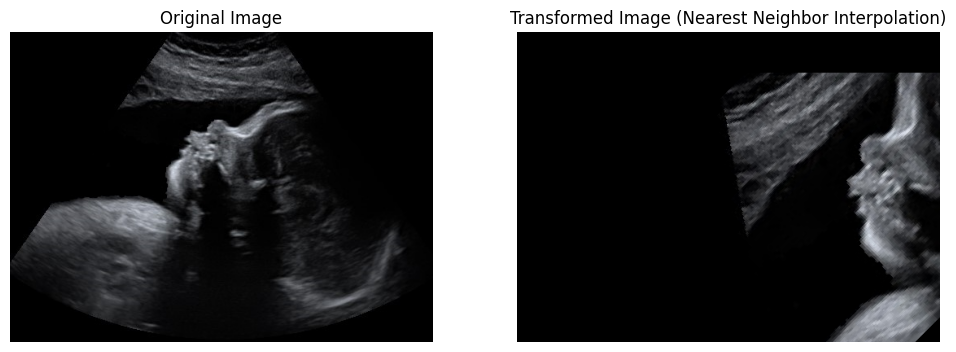

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'baby.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Get the image dimensions
    rows, cols, _ = image.shape

    # Define scaling factor
    sx, sy = 1.5, 1.5  # Scale by 1.5

    # Define rotation angle
    angle = 45  # Rotate by 45 degrees
    center = (cols // 2, rows // 2)  # Rotate around the center

    # Define translation factors (tx and ty)
    tx, ty = 100, 50  # Translate by 100 pixels in x and 50 pixels in y

    # 1. Scaling matrix (2x3)
    scaling_matrix = np.float32([[sx, 0, 0], [0, sy, 0]])

    # 2. Rotation matrix (2x3) using cv2.getRotationMatrix2D
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

    # 3. Translation matrix (2x3)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

    # Apply scaling first
    scaled_image = cv2.warpAffine(image, scaling_matrix, (cols, rows), flags=cv2.INTER_NEAREST)

    # Apply rotation after scaling
    rotated_image = cv2.warpAffine(scaled_image, rotation_matrix, (cols, rows), flags=cv2.INTER_NEAREST)

    # Apply translation after rotation
    final_image = cv2.warpAffine(rotated_image, translation_matrix, (cols, rows), flags=cv2.INTER_NEAREST)

    # Display the original and transformed images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Transformed image using nearest neighbor interpolation
    ax[1].imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Transformed Image (Nearest Neighbor Interpolation)")
    ax[1].axis('off')

    plt.show()


Bilinear interpolation

Bilinear interpolation is a method for resampling images and is more accurate than nearest neighbor interpolation. It calculates the output pixel value based on a weighted average of the four nearest pixel values in the original image. It considers the distances of the target point from the surrounding pixels in both the x and y directions.

How Bilinear Interpolation Works:

Identify the four neighboring pixels: For each pixel in the output image, find the four closest pixels in the input image.

Compute the interpolated value: Use a weighted average of these four pixels based on their distances to the target pixel.

The equation for bilinear interpolation is:

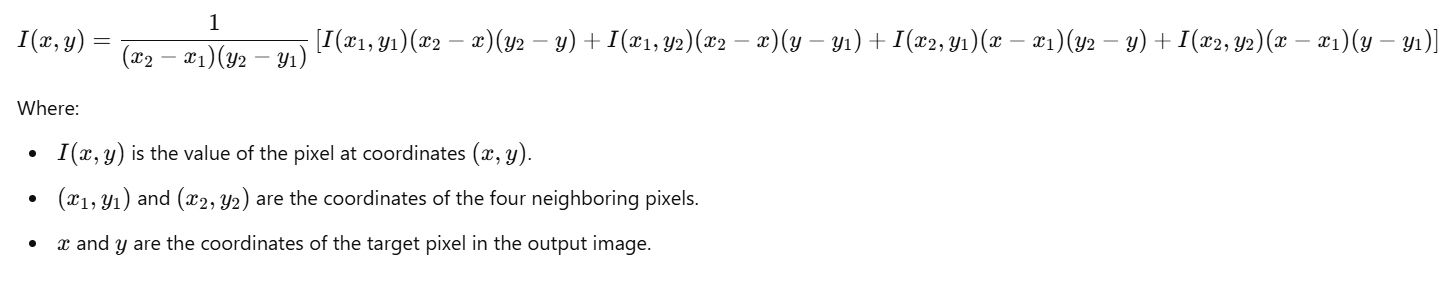

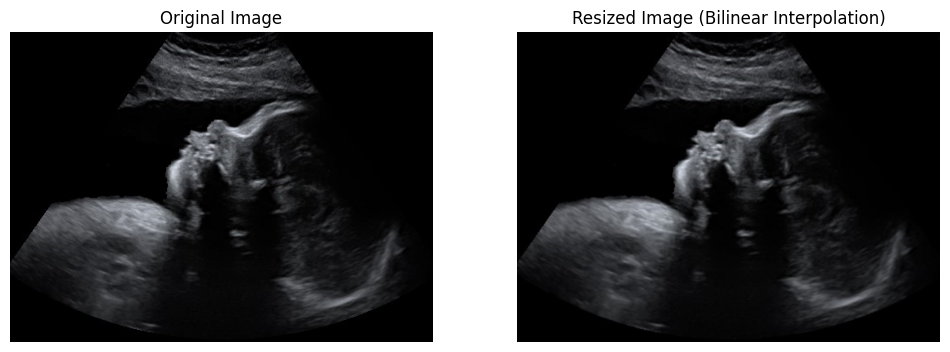

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'baby.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Resize the image using bilinear interpolation (INTER_LINEAR)
    height, width = image.shape[:2]
    new_width = int(width * 1.5)  # Scale width by 1.5
    new_height = int(height * 1.5)  # Scale height by 1.5

    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

    # Display the original and resized images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Resized image using bilinear interpolation
    ax[1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Resized Image (Bilinear Interpolation)")
    ax[1].axis('off')

    plt.show()


Bicubic interpolation

Bicubic interpolation is an advanced resampling method that uses the values of 16 neighboring pixels (4x4 grid) to calculate the new pixel value. It performs better than bilinear interpolation in terms of image quality because it considers more surrounding pixels and applies a cubic polynomial for the interpolation.

How Bicubic Interpolation Works:

In bicubic interpolation, the value of a new pixel is calculated using a weighted average of the 16 nearest pixels based on a cubic convolution function. This method provides smoother gradients and sharper results than bilinear interpolation.

The interpolation is performed in both the horizontal (x) and vertical (y) directions, with the formula being:

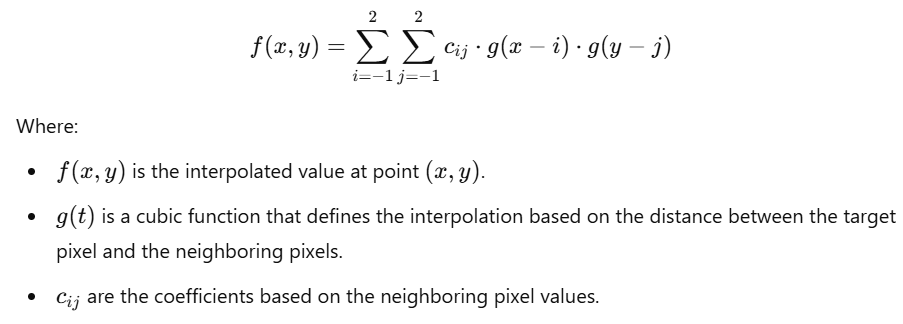

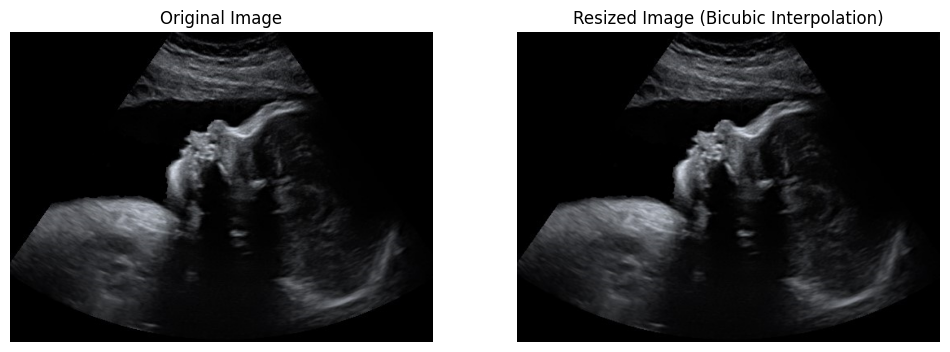

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image_path = 'baby.jpg'  # Replace with your image path
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not read the image. Please check the file path.")
else:
    # Resize the image using bicubic interpolation (INTER_CUBIC)
    height, width = image.shape[:2]
    new_width = int(width * 1.5)  # Scale width by 1.5
    new_height = int(height * 1.5)  # Scale height by 1.5

    resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    # Display the original and resized images
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original image
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Original Image")
    ax[0].axis('off')

    # Resized image using bicubic interpolation
    ax[1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Resized Image (Bicubic Interpolation)")
    ax[1].axis('off')

    plt.show()


Biquadratic interpolation

Biquadratic interpolation is not as commonly used as the other interpolation methods like nearest neighbor, bilinear, or bicubic interpolation. However, it refers to the use of a quadratic function for interpolation in both the horizontal and vertical directions. Specifically, it involves fitting a second-degree polynomial (quadratic) to the neighboring points and using it to compute the interpolated values.

The concept of biquadratic interpolation can be extended from quadratic interpolation by considering not just linear or cubic polynomials but polynomials of degree 2, which means the interpolation function takes the form:

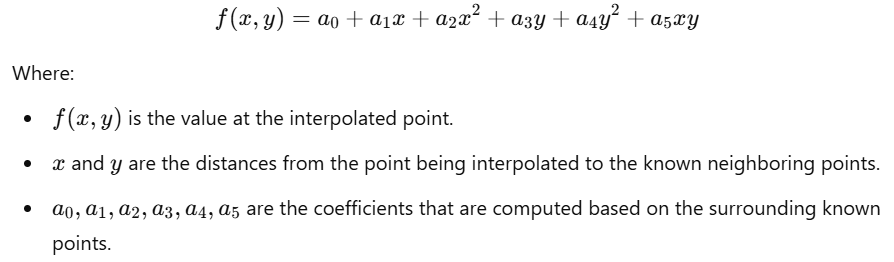

Fourier Transform

The Fourier Transform is a powerful mathematical technique that transforms a signal (in this case, an image) from the spatial domain (pixel space) into the frequency domain. In the frequency domain, an image is represented by a combination of sinusoidal waves, each having a frequency, amplitude, and phase.

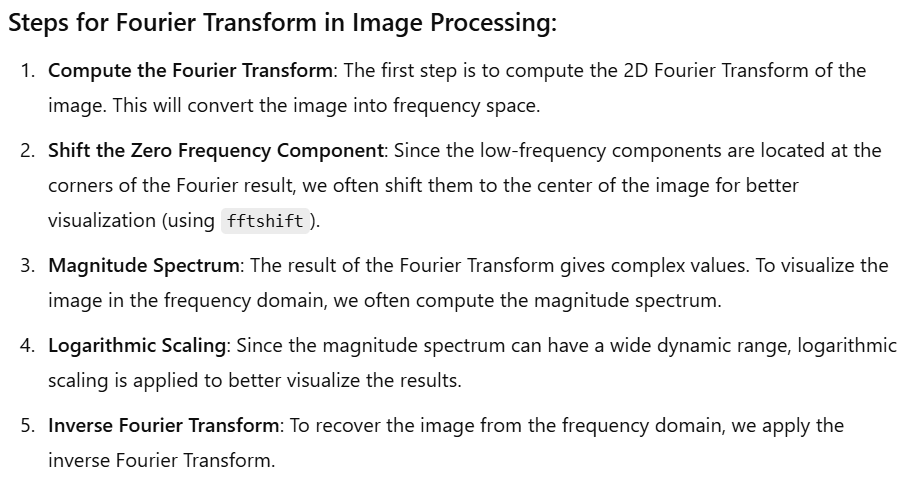

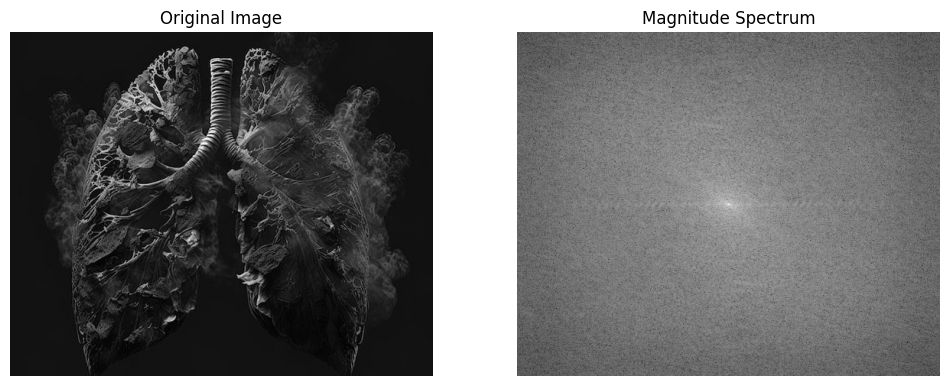

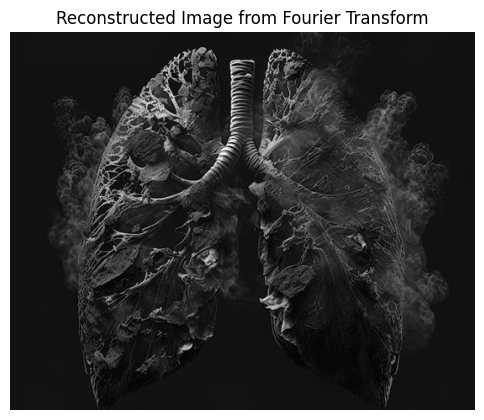

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read the image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    print("Error: Could not read the image.")
else:
    # Step 1: Perform Fourier Transform
    f = np.fft.fft2(image)  # 2D Fourier Transform

    # Step 2: Shift the zero frequency component to the center
    fshift = np.fft.fftshift(f)

    # Step 3: Compute the magnitude spectrum
    magnitude_spectrum = np.abs(fshift)

    # Step 4: Apply logarithmic scaling for better visualization
    magnitude_spectrum = np.log(magnitude_spectrum + 1)

    # Step 5: Plot the original image and its magnitude spectrum
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Magnitude spectrum
    plt.subplot(1, 2, 2)
    plt.imshow(magnitude_spectrum, cmap='gray')
    plt.title("Magnitude Spectrum")
    plt.axis('off')

    plt.show()

    # Step 6: Inverse Fourier Transform (to reconstruct the image)
    f_ishift = np.fft.ifftshift(fshift)  # Inverse shift
    img_back = np.fft.ifft2(f_ishift)  # Inverse Fourier Transform
    img_back = np.abs(img_back)  # Take the absolute value to remove the complex part

    # Display the reconstructed image
    plt.figure(figsize=(6, 6))
    plt.imshow(img_back, cmap='gray')
    plt.title("Reconstructed Image from Fourier Transform")
    plt.axis('off')
    plt.show()


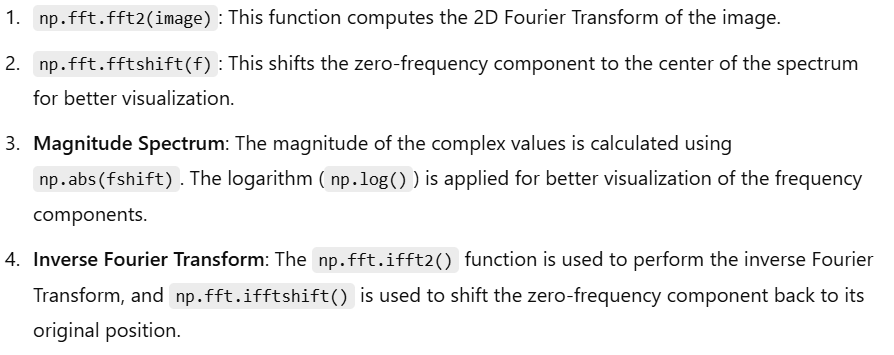

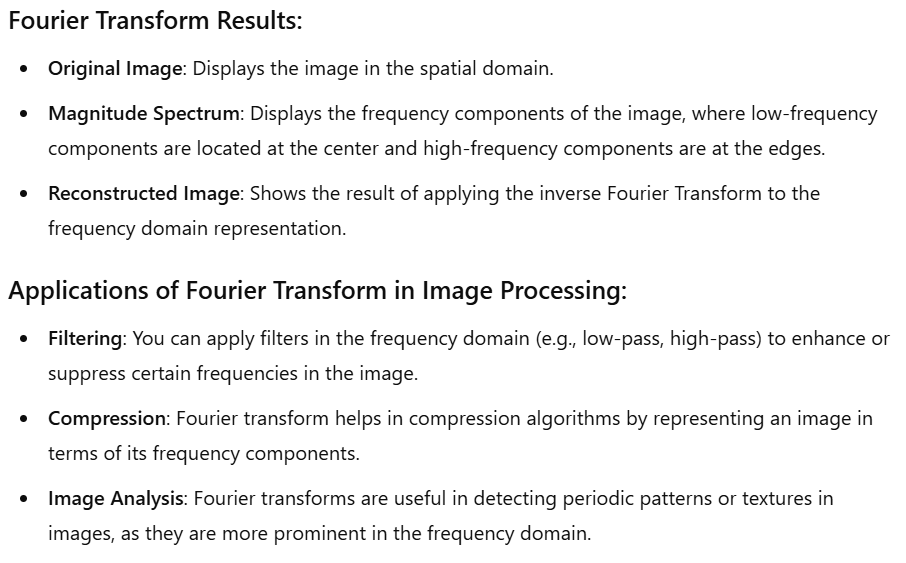

Convolution

Convolution is a mathematical operation used in image processing that combines two functions (in this case, an image and a filter/kernel) to produce a third function (an output image). In the context of image processing, convolution is typically used to apply filters for edge detection, blurring, sharpening, and other effects.

The basic idea of convolution is that a kernel (a small matrix) slides over the image (a larger matrix) and at each position, the kernel is multiplied element-wise with the corresponding section of the image, and the results are summed up to produce a single output value.

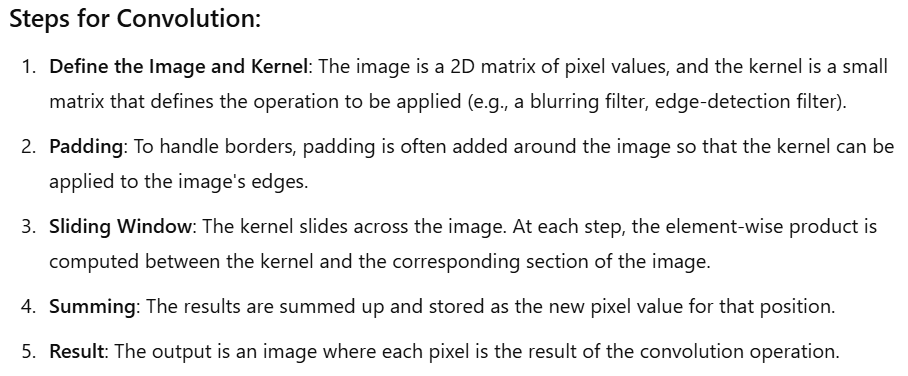

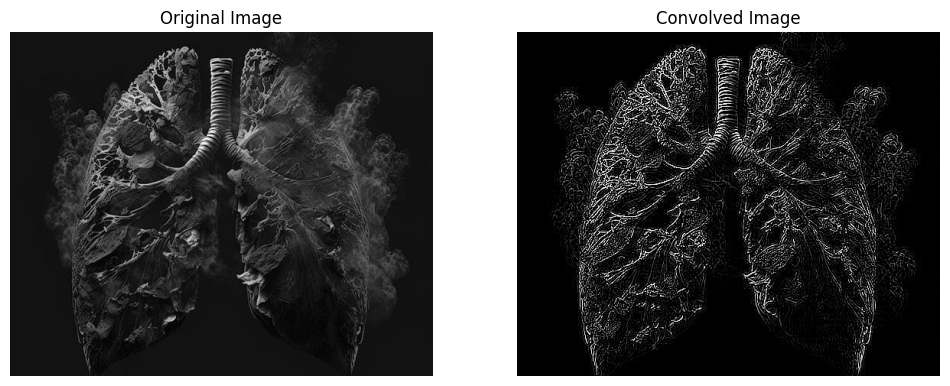

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Read an image
image_path = 'lung.jpg'  # Replace with your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded correctly
if image is None:
    print("Error: Could not read the image.")
else:
    # Define a kernel for convolution (e.g., a simple 3x3 edge detection filter)
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

    # Step 1: Perform convolution using OpenCV's filter2D function
    convolved_image = cv2.filter2D(image, -1, kernel)

    # Step 2: Display the original and convolved images
    plt.figure(figsize=(12, 6))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Convolved image
    plt.subplot(1, 2, 2)
    plt.imshow(convolved_image, cmap='gray')
    plt.title("Convolved Image")
    plt.axis('off')

    plt.show()


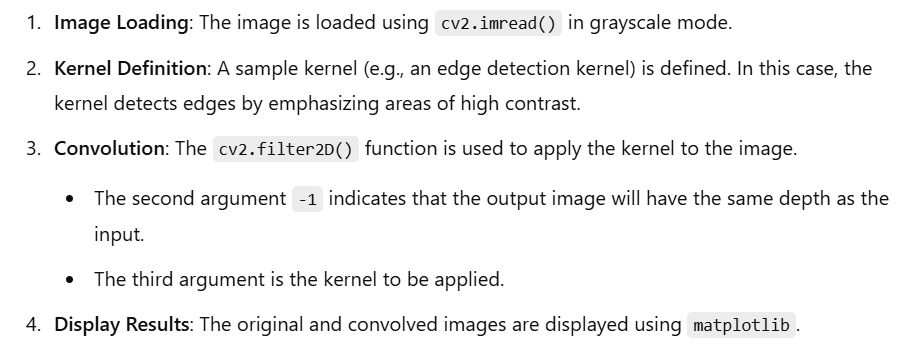

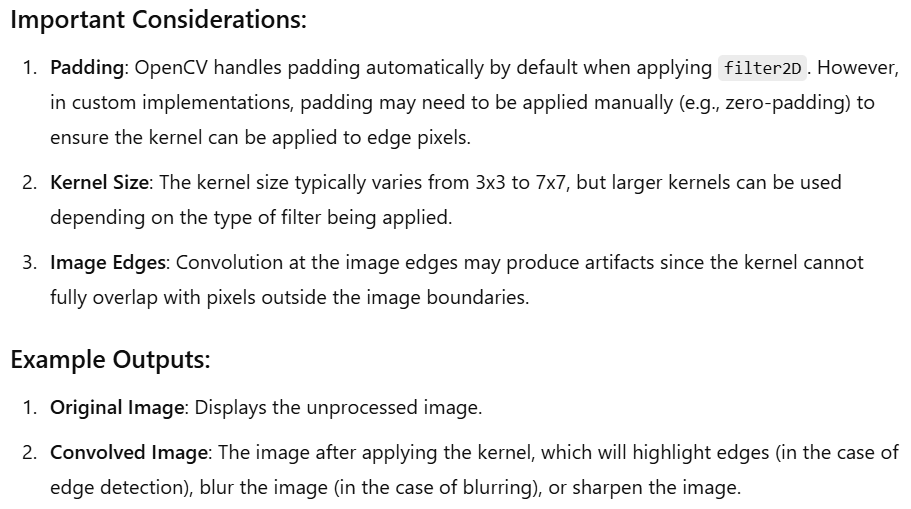